<a href="https://colab.research.google.com/github/Serbeld/ArtificialVisionForQualityControl/blob/master/NN_Cans_Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network Inception Model V3

Build a CNN using Tensorflow and Keras to classify Cans. The Colombian_cans_240x320xV2 dataset consists in 15048 colour images, divided in 7 classes. There are 10528 training images, 2256 validation images and 2257 test images.

- Author: Sergio Luis Beleño Díaz
- Date: 2020-02-08



## Setup


Install and import TensorFlow and dependencies:


In [1]:
!pip install h5py
import h5py

from google.colab import drive,files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
hdf5_path = '/content/drive/My Drive/Colombian_cans_240x320xV2.hdf5'

dataset = h5py.File(hdf5_path, "r")


## Exploratory Data Analysis

In [0]:
# Parameters
batch_size = 10
num_classes = 7
num_epochs = 15

Using TensorFlow backend.


Labels            Classes                 OneHot       
Golden               0           [1. 0. 0. 0. 0. 0. 0.]
DefectiveGolden      1           [0. 1. 0. 0. 0. 0. 0.]
Background           2           [0. 0. 1. 0. 0. 0. 0.]
DefectiveBlack       3           [0. 0. 0. 1. 0. 0. 0.]
Black                4           [0. 0. 0. 0. 1. 0. 0.]
Red                  5           [0. 0. 0. 0. 0. 1. 0.]
DefectiveRed         6           [0. 0. 0. 0. 0. 0. 1.]

Salida:                          [0. 0. 0. 0. 1. 0. 0.]


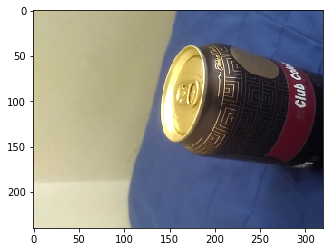

In [4]:
import tensorflow as tf
import numpy as np
import os
from keras.utils import to_categorical
from keras import backend as k
from keras.models import Model
from keras.layers import Dense,Dropout,Flatten,Input,AveragePooling2D
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.optimizers import SGD,Adam
from keras.applications import inception_v3
import matplotlib.pylab as plt

# Size
filas,columnas = 240,320
img_shape = (filas, columnas, 3)

#train
train_img = dataset["train_img"]

xt = np.array(train_img)
yt = np.array(dataset["train_labels"])

#test
xtest = np.array(dataset["test_img"])
ytest = np.array(dataset["test_labels"])

#Validation
xval = np.array(dataset["val_img"])
yval = np.array(dataset["val_labels"])

#Labels             Classes            OneHot     
#Golden:               0           [1 0 0 0 0 0 0]
#DefectiveGolden:      1           [0 1 0 0 0 0 0]
#Background:           2           [0 0 1 0 0 0 0]
#DefectiveBlack:       3           [0 0 0 1 0 0 0]
#Black:                4           [0 0 0 0 1 0 0]
#Red:                  5           [0 0 0 0 0 1 0]
#DefectiveRed:         6           [0 0 0 0 0 0 1]

#Categorical values or OneHot
yt = to_categorical(yt,num_classes)
ytest = to_categorical(ytest,num_classes)
yval = to_categorical(yval,num_classes)

print("Labels            Classes                 OneHot       ")
print("Golden               0           [1. 0. 0. 0. 0. 0. 0.]")
print("DefectiveGolden      1           [0. 1. 0. 0. 0. 0. 0.]")
print("Background           2           [0. 0. 1. 0. 0. 0. 0.]")
print("DefectiveBlack       3           [0. 0. 0. 1. 0. 0. 0.]")
print("Black                4           [0. 0. 0. 0. 1. 0. 0.]")
print("Red                  5           [0. 0. 0. 0. 0. 1. 0.]")
print("DefectiveRed         6           [0. 0. 0. 0. 0. 0. 1.]")

#Image
num_de_imagen = 20

print()
print("Salida:                          "+ str(yt[num_de_imagen]))

imagen =  train_img[num_de_imagen]
plt.imshow(imagen)
plt.show()

As we can see, the images in the dataset have a dimension of 240x320x3

In [5]:
#Get the shape of x_train
print('x_train shape:     ', xt.shape)
#Get the shape of y_train
print('y_train shape:     ', yt.shape)
#Get the shape of x_validation
print('x_validation shape:', xval.shape)
#Get the shape of y_validation
print('y_validation shape:', yval.shape)
#Get the shape of x_test
print('x_test shape:      ', xtest.shape)
#Get the shape of y_test
print('y_test shape:      ', ytest.shape)

x_train shape:      (10528, 240, 320, 3)
y_train shape:      (10528, 7)
x_validation shape: (2256, 240, 320, 3)
y_validation shape: (2256, 7)
x_test shape:       (2257, 240, 320, 3)
y_test shape:       (2257, 7)


## Model Setup

In [6]:
#Inputs
inputs = Input(shape=img_shape, name='images')

#Inception Model
output = inception_v3.InceptionV3(include_top=False,weights=None, 
                                  input_shape=img_shape,
                                  classes = num_classes)(inputs)

#AveragePooling2D
output = AveragePooling2D(pool_size=(2, 2), strides=None, 
                          padding='valid',name='AvgPooling')(output)

#Flattened
output = Flatten(name='Flatten')(output)

#Dropout
output = Dropout(0.25,name='Dropout')(output)

#ReLU layer
output = Dense(1000, activation = 'relu',name='ReLU')(output)

#Dense layer
output = Dense(num_classes, activation='softmax',name='softmax')(output)

#Checkpoint_path
checkpoint_path = "/content/drive/My Drive/checkpoint/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_best_only=True, 
                                                 verbose=1)
#Model
modelo = Model(inputs=inputs, outputs=output)

ADAM = Adam(lr=0.00002)
modelo.compile(loss='categorical_crossentropy',optimizer=ADAM,
               metrics=['categorical_accuracy'])

#Summary
modelo.summary()














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
images (InputLayer)          (None, 240, 320, 3)       0         
_________________________________________________________________
inception_v3 (Model)         (None, 6, 8, 2048)        21802784  
_________________________________________________________________
AvgPooling (AveragePooling2D (None, 3, 4, 2048)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 24576)             0         
_________________________________________________________________
Dropout (Dropout)            (None, 24576)             0         
_________________________________________________________________
ReLU (Dense)                 (None, 1000)              245770

## Traning

The primary use case is to automatically save checkpoints *during* and at *the end* of training. This way you can use a trained model without having to retrain it, or pick-up training where you left of—in case the training process was interrupted.

#### Checkpoint callback usage

Train the model and pass it the `ModelCheckpoint` callback:

In [7]:
stad = modelo.fit({'images': xt}, {'softmax': yt}, batch_size=batch_size,
           epochs=num_epochs, validation_data=(xval, yval),shuffle=True)

puntuacion = modelo.evaluate(xtest,ytest,verbose=1)

print(puntuacion)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 10528 samples, validate on 2256 samples
Epoch 1/15
10528/10528 [==============================] - 244s 23ms/step - loss: 1.2939 - categorical_accuracy: 0.4916 - val_loss: 0.7894 - val_categorical_accuracy: 0.6738
Epoch 2/15
10528/10528 [==============================] - 214s 20ms/step - loss: 0.8192 - categorical_accuracy: 0.6624 - val_loss: 0.6329 - val_categorical_accuracy: 0.7296
Epoch 3/15
10528/10528 [==============================] - 214s 20ms/step - loss: 0.6558 - categorical_accuracy: 0.7366 - val_loss: 0.5121 - val_categorical_accuracy: 0.7775
Epoch 4/15
10528/10528 [==============================] - 214s 20ms/step - loss: 0.5146 - categorical_accuracy: 0.7977 - val_loss: 0.4087 - val_categorical_accuracy: 0.8422
Epoch 5/15
10528/10528 [==============================] - 214s 20ms/step - loss: 0.4090 - categorical_accuracy: 0.8379 - val_loss: 0.4047 - val_categorical_accurac

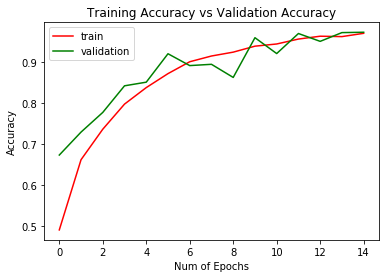

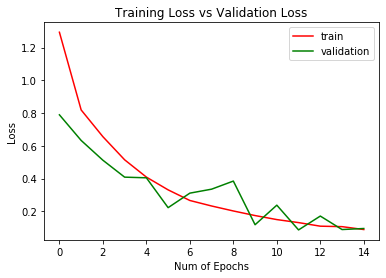

In [8]:
plt.figure(0)  
plt.plot(stad.history['categorical_accuracy'],'r')  
plt.plot(stad.history['val_categorical_accuracy'],'g')  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(stad.history['loss'],'r')  
plt.plot(stad.history['val_loss'],'g')  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

##Saving

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

modelo.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'})                       
model_file.SetContentFile('model.h5')                       
model_file.Upload()


##Predictions

(240, 320, 3)


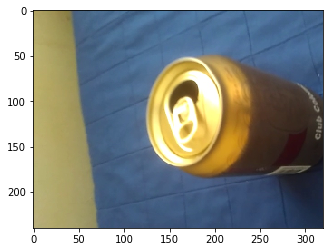

Labels            Classes                 OneHot       
Golden               0           [1. 0. 0. 0. 0. 0. 0.]
DefectiveGolden      1           [0. 1. 0. 0. 0. 0. 0.]
Background           2           [0. 0. 1. 0. 0. 0. 0.]
DefectiveBlack       3           [0. 0. 0. 1. 0. 0. 0.]
Black                4           [0. 0. 0. 0. 1. 0. 0.]
Red                  5           [0. 0. 0. 0. 0. 1. 0.]
DefectiveRed         6           [0. 0. 0. 0. 0. 0. 1.]

Preditions:                      [[0. 1. 0. 0. 0. 0. 0.]]


In [11]:
Num_image = 1

inputoimage = xt[Num_image]

print(inputoimage.shape)

x = inputoimage.reshape((-1, 240, 320, 3))

imagen =  xt[Num_image]
plt.imshow(imagen)
plt.show()

print("Labels            Classes                 OneHot       ")
print("Golden               0           [1. 0. 0. 0. 0. 0. 0.]")
print("DefectiveGolden      1           [0. 1. 0. 0. 0. 0. 0.]")
print("Background           2           [0. 0. 1. 0. 0. 0. 0.]")
print("DefectiveBlack       3           [0. 0. 0. 1. 0. 0. 0.]")
print("Black                4           [0. 0. 0. 0. 1. 0. 0.]")
print("Red                  5           [0. 0. 0. 0. 0. 1. 0.]")
print("DefectiveRed         6           [0. 0. 0. 0. 0. 0. 1.]")

ynew = modelo.predict(x)
print()
print("Preditions:                      "+ str(np.round(ynew)))